<a href="https://colab.research.google.com/github/andreasallo/machineLearning/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AUXILIAR

### LLIBRERIES

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.special import expit as sigmoid
#from google.colab import files
import time

### Funcions auxiliars de PLOT

In [ ]:
def plot_1D_data(pos,neg,xlim=(-5,5),ylim=(-5,5)):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(pos,np.zeros(pos.size),s=100,c='b',marker='+')
  plt.scatter(neg,np.zeros(pos.size),s=100,c='r',marker='_')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel('$x_1$')

def plot_2D_data(pos,neg,xlim=(-5,5),ylim=(-5,5)):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(pos[:,0],pos[:,1],s=100,c='b',marker='+')
  plt.scatter(neg[:,0],neg[:,1],s=100,c='r',marker='_')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

def plot_2D_data_unsup(X,xlim=(-5,5),ylim=(-5,5),xlabel='$x_1$',ylabel='$x_2$',color='b',label=''):
  plt.grid(color=[.9,.9,.9])
  plt.scatter(X[:,0],X[:,1],s=100,c=color,marker='o',label=label)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

def plot_2D_plane(w,w0,xlim,ylim):
  xx = np.linspace(xlim[0],xlim[1],100)
  l1 = plt.plot(xx, -w[0]/w[1]*xx -w0/w[1], label='hyperplane')
  plt.grid(color=[.9,.9,.9])
  d = -w0/np.linalg.norm(w)
  o = w/np.linalg.norm(w) * -w0/np.linalg.norm(w);
  xx2 = np.linspace(0,o[0],10)
  yy2 = np.linspace(0,o[1],10)
  label = "$d=-w_0/|\mathbf{w}|=%.2f$" % d
  l2 = plt.plot(xx2,yy2,'--',label=label)
  l3 = plt.arrow(o[0], o[1], w[0], w[1], head_width=.1, label='$\mathbf{w}$')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.axis('square')
  ax = plt.gca()
  ax.set_xticks(range(xlim[0],xlim[1]))
  ax.set_yticks(range(ylim[0],ylim[1]))
  plt.xlim(xlim)
  plt.ylim(ylim)

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\janpr\AppData\Local\Temp\ipykernel_11092\817006554.py:34: SyntaxWarning: invalid escape sequence '\m'
  label = "$d=-w_0/|\mathbf{w}|=%.2f$" % d
C:\Users\janpr\AppData\Local\Temp\ipykernel_11092\817006554.py:36: SyntaxWarning: invalid escape sequence '\m'
  l3 = plt.arrow(o[0], o[1], w[0], w[1], head_width=.1, label='$\mathbf{w}$')


### Auxiliars DescensGradient

In [ ]:
class my_GDClassifier():
    """
    Logistic Regression implemented with Gradient Descent.
    """

    def __init__(self, add_bias = True, lam = 0, max_iter = 1000, eps = 1e-8, eta = 1e-2):
        """
        Creates an instance of our my_GDClassifier model

        Parameters
        ----------
        max_iter: maximes iteracions que farà el nostre algorisme sí no convergeix abans.
        eps: Designa el criteri de convergència.
        eta: Factor d'aprenentatge del Gradient Descent.
        lam: weight controlling the regularizer, or lambda.
        """
        self.add_bias = add_bias    # Indica si s'ha d'afegir un biaix. Per tant serà True per defecte.
        self.lam = lam              # Estableix el pes del regularitzador.
        self.max_iter = max_iter    # Estableix el nombre màxim d'iteracions.
        self.eps = eps              # Estableix el criteri de convergència que ha de ser més gran que 0.
        self.eta = eta              # Estableix el factor d'aprenentatge
        self.nb_iter = 1            # Inicialitza el comptador d'iteracions
        self.training_error = np.array([])  # Inicialitza l'array d'errors d'entrenament és a dir els errors de cada iteració.
        self.n_samples = 0          # Inicialitza el nombre de mostres és a dir el nombre de files de X
        self.n_features = 0         # Inicialitza el nombre de característiques és a dir el nombre de columnes de X
        if add_bias:
          self.w = np.zeros([1, self.n_features + 1])[0]  # Inicialitza els pesos amb zeros, incloent el biaix
        else:
          self.w = np.zeros([1, self.n_features])[0]      # Inicialitza els pesos amb zeros, sense incloure el biaix

    def cross_entropy_error(self, X, y, w):
        """
        Computes the Cross-Entropy Loss Function
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        error: integer,
                The Cross-Entropy Loss
        """
        loglik = 0
        for n in range(X.shape[0]):
            a = np.dot(X[n], w)             #Calcula el producto punto entre la n-ésima fila de X y los pesos w és a dir: z = w^T * x
            yhat = 1 / (1 + np.exp(-a))     #Aplica la función sigmoide al resultado para obtener la probabilidad predicha yhat, és a dir yhat = 1 / (1 + exp(-z))

            #yhat =  sigmoid(w@X[n,:])

            loglik_n = y[n] * np.log(yhat + 1e-9) + (1 - y[n]) * np.log(1 - yhat +1e-9)  #Calcula el error de entropía cruzada para la n-ésima observación, és a dir loglik_n = y * log(yhat) + (1 - y) * log(1 - yhat)

            loglik += loglik_n              #Acumula el error total sumando el error para la n-ésima observación
        return -loglik/X.shape[0] + self.lam/2 * np.power(np.linalg.norm(w),2) #Retorna el error total normalizado és a dir -loglik/N + lam/2 * ||w||^2


    def gradient(self, X, y, w):
        """
        Computes the gradient of the objective function at point w using data set (X, y)
        Assumes Cross-Entropy and binary logistic regression model
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        grad: ndarray, shape (1, n_features)
                The gradient of the Cross-Entropy Loss Function
        """

        #initialize gradient
        grad = np.zeros([self.n_features+1])

        for n in range(X.shape[0]):
            #z = np.dot(X[n], w)                 #Calcula el producte escalar entre la n-èsima fila de X i els pesos w és a dir z = w^T * x
            #yhat = 1 / (1 + np.exp(-z))         #Aplica la funció sigmoide al resultat per obtenir la probabilitat predita yhat és a dir yhat = 1 / (1 + exp(-z))

            yhat =  sigmoid(w@X[n,:])

            gradient_n = (yhat - y[n]) * X[n,:]   #Calcula el gradient per a la n-èsima observació és a dir gradient_n = (yhat - y) * x
            grad += gradient_n                  #Acumula el gradient total sumant el gradient per a la n-èsima observació

        return grad/X.shape[0] + self.lam*w #Retorna el gradient total normalitzat és a dir grad/N + lam * w

    def fit(self, X, y):
        """
        Ajusta el nostre model de Regressió Logística al conjunt de dades (X, y)

        Paràmetres
        ----------
        X: ndarray, forma (n_samples, n_features)
            El conjunt d'entrenament.
            n_samples == nombre de punts en el conjunt de dades.
            n_features == dimensió dels punts.
        y: ndarray, forma (n_samples,)
            La classe de cada punt (0: negatiu, 1: positiu).
            n_samples == nombre de punts en el conjunt de dades.

        Retorna
        -------
        self: logReg
            El model de Regressió Logística entrenat en (X, y).
        """
        self.n_samples = X.shape[0]                                   # Establim el nombre de mostres (files de X)
        self.n_features = X.shape[1]                                  # Establim el nombre de característiques (columnes de X)
        if self.add_bias:
            X = np.hstack([np.ones((self.n_samples,1)),X])            # afegim una entrada fictícia per al biaix
            self.w = np.random.randn(self.n_features + 1)             # inicialitzem els pesos amb valors aleatoris incloent el biaix
        else:
            self.w = np.random.randn(self.n_features)                 # inicialitzem els pesos amb valors aleatoris sense incloure el biaix

        convergence = False                                           # comencem amb la condició més gran que eps per assegurar que fem almenys una iteració
        prev_error = np.Inf                                           # inicialitzem l'error previ a infinit per assegurar que fem almenys una iteració
        while (not convergence) and (self.nb_iter < self.max_iter):   # iterem fins a la convergència o fins a arribar al màxim d'iteracions permès
            w_old = self.w                                            # guardem els pesos actuals per a comparar-los després amb els nous. w^(t-1)

            # TODO
            # actualitzem els pesos
            grad = self.gradient(X, y, self.w)                        # calculem el gradient de la funció objectiu en els pesos actuals utilitzant les dades d'entrenament.
            self.w = w_old - self.eta * grad                          # actualitzem els pesos utilitzant el pas d'aprenentatge i el gradient calculat anteriorment. w^t

            # calculem l'error d'entropia creuada per aquesta iteració i el guardem és a dir J(w^t)
            error = self.cross_entropy_error(X, y, self.w)

            self.training_error = np.append(self.training_error, error)  # guardem l'error d'entrenament, és a dir J(w^t), per aquesta iteració.
            self.nb_iter += 1                                            # incrementem el comptador d'iteracions

            # comprovem la condició de convergència
            convergence = abs(error - prev_error) < self.eps # és a dir |J(w^t) - J(w^(t-1))| < eps
            prev_error = error  # actualitzem l'error previ

        return self  # retornem el model entrenat

    def predict(self, X):
        """
        Predict the classes of points in X.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points whose classes are to predict.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        Returns
        -------
        predictions: ndarray, shape (n_samples)
                      The predicted classes.
                      n_samples == number of points in the dataset.
        """
        if self.add_bias:
          X = np.hstack([np.ones((X.shape[0],1)),X]) # això és per afegir una columna de 1s per al biaix

        # return prediction of the model for given X data points és a dir retorna la predicció del model per a les dades X donades
        prediction = np.reshape(sigmoid(self.w@X.T) > 0.5,(-1,)) # retorna la predicció del model per a les dades X donades
        return prediction

    def score(self, X, y): # és a dir la precisió del model és a dir la proporció de prediccions correctes
        """
        Compute the accuracy of the classifier on the set X, provided the ground-truth y.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points on which to compute the score.
            n_samples == number of points in the dataset.
            n_features == dimension of the points (e.g. each sample is in R^2).
        y: ndarray, shape (n_samples,)
            The ground-truth of the labels.
            n_samples == number of points in the dataset.
        Returns
        -------
        score: float
                Accuracy of the classifier.
        """
        if self.training_error.size == 0:
          print('train first!')
          return -1
        else:
          return np.mean(self.predict(X) == y)

### Auxiliars StochasticDescensGradient

In [ ]:
class my_SGDClassifier():
    """
    Logistic Regression implemented with Gradient Descent.
    """

    def __init__(self, batch_size = 1, add_bias = True, lam = 0, max_iter = 1000, eps = 1e-8, eta = 1e-2):
        """
        Creates an instance of our my_GDClassifier model

        Parameters
        ----------
        max_iter: maximun number of iteration if convergence is not achieved.
        eps: sets the convergence criterion.
        eta: learning rate or step size.
        lam: weight controlling the regularizer, or lambda.
        """
        self.batch_size = batch_size
        self.add_bias = add_bias
        self.lam = lam
        self.max_iter = max_iter
        self.eps = eps
        self.eta = eta
        self.nb_iter = 1
        self.training_error = np.array([])
        self.n_samples = 0
        self.n_features = 0
        if add_bias:
          self.w = np.zeros([1, self.n_features + 1])[0]
        else:
          self.w = np.zeros([1, self.n_features])[0]

    def cross_entropy_error(self, X, y, w):
        """
        Computes the Cross-Entropy Loss Function
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        error: integer,
                The Cross-Entropy Loss
        """
        loglik = 0
        for n in range(X.shape[0]):
            yhat = sigmoid(w@X[n,:])

            # TODO
            # compute negative log-likelihood / cross-entropy error for this point
            loglik_n = y[n]*np.log(yhat+1e-9)+(1-y[n])*np.log(1-yhat+1e-9)
            # Note: the 1e-9 is added to avoid numerical errors

            loglik += loglik_n

        return -loglik/X.shape[0] + self.lam/2 * np.power(np.linalg.norm(w),2)

    def gradient(self, Xb, yb, w):
        """
        Computes the gradient of the objective function at point w using data set (X, y)
        Assumes Cross-Entropy and binary logistic regression model
        Assumes bias is included in w

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.

        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        w: ndarray, shape(1, n_features)

        Returns
        -------
        grad: ndarray, shape (1, n_features)
                The gradient of the Cross-Entropy Loss Function
        """

        #initialize gradient
        grad = np.zeros([self.n_features+1])

        for n in range(Xb.shape[0]):
            yhat = sigmoid(w@Xb[n,:])

            gradient_n = (yhat-yb[n])*Xb[n,:]
            grad += gradient_n

        return grad/Xb.shape[0] + self.lam*w

    def fit(self, X, y):
        """
        Fit our Logistic Regression model to the data set (X, y)

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The training set.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        y: ndarray, shape (n_samples,)
            The class of each point (0: negative, 1: positive).
            n_samples == number of points in the dataset.

        Returns
        -------
        self: logReg
               The Logistic Regression model trained on (X, y).
        """
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        if self.add_bias:
          X = np.hstack([np.ones((self.n_samples,1)),X])  # add dummy input
          self.w = np.random.randn(self.n_features + 1)
        else:
          self.w = np.random.randn(self.n_features)

        convergence = False  # start with cond greater than eps
        prev_error = np.Inf
        while (not convergence) and (self.nb_iter < self.max_iter):
            w_old = self.w

            #update weights
            ind = np.random.choice( np.arange(X.shape[0]), self.batch_size, replace=False)
            self.w = w_old - self.eta*self.gradient(X[ind], y[ind], w_old)

            #compute cross entropy error for this iteration and save it
            error = self.cross_entropy_error(X, y, self.w)

            self.training_error = np.append(self.training_error, error)
            self.nb_iter += 1

            #check convergence condition
            convergence = abs(error - prev_error) < self.eps
            prev_error = error

        return self

    def predict(self, X):
        """
        Predict the classes of points in X.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points whose classes are to predict.
            n_samples == number of points in the dataset.
            n_features == dimension of the points.
        Returns
        -------
        predictions: ndarray, shape (n_samples)
                      The predicted classes.
                      n_samples == number of points in the dataset.
        """
        if self.add_bias:
          X = np.hstack([np.ones((X.shape[0],1)),X])

        # return prediction of the model for given X data points
        prediction = np.reshape(sigmoid(self.w@X.T) > 0.5,(-1,))
        return prediction

    def score(self, X, y):
        """
        Compute the accuracy of the classifier on the set X, provided the ground-truth y.

        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            The set of points on which to compute the score.
            n_samples == number of points in the dataset.
            n_features == dimension of the points (e.g. each sample is in R^2).
        y: ndarray, shape (n_samples,)
            The ground-truth of the labels.
            n_samples == number of points in the dataset.
        Returns
        -------
        score: float
                Accuracy of the classifier.
        """
        if self.training_error.size == 0:
          print('train first!')
          return -1
        else:
          return np.mean(self.predict(X) == y)

## TITANIC DATASET

### DOWNLOAD DATASET

In [ ]:
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/gender_submission.csv
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/test.csv
!wget https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/train.csv

train = pd.read_csv('train.csv')
train.rename(columns = {'Sex':'Gender'},inplace=True)
train['Gender'].replace('male', 'man', inplace=True)
train['Gender'].replace('female', 'woman', inplace=True)
train.head()

--2024-05-02 16:53:00--  https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/gender_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3258 (3,2K) [text/plain]
Saving to: 'gender_submission.csv.4'

     0K ...                                                   100% 67,9K=0,05s

2024-05-02 16:53:00 (67,9 KB/s) - 'gender_submission.csv.4' saved [3258/3258]

--2024-05-02 16:53:00--  https://raw.githubusercontent.com/aig-upf/public-ml-course-undergrads/main/P01/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respon

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",man,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",woman,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",woman,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",woman,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",man,35.0,0,0,373450,8.0500,NaN,S


### PROCESSING 1 + 2 (IMPORT + REPLACE NANs)

We select the following five inputs:
- `Pclass` : The class of the ticket, it can be 1rd, 2nd or 3rd
- `Gender` : The gender of the Passenger
- `Age` : Age in Years
- `Fare` : Passenger Fare
- `embarked` : Port of Embarkation(C = Cherbourg, Q = Queenstown, S= Southampton)

And the following output:
- `Survived`: If the passenger survived (1) or not (0)

In [ ]:
df = train.loc[:,['Pclass', 'Gender', 'Age', 'Fare','Embarked','Survived']]
df.head()

,Pclass,Gender,Age,Fare,Embarked,Survived
0,3,man,22.0,7.2500,S,0
1,1,woman,38.0,71.2833,C,1
2,3,woman,26.0,7.9250,S,1
3,1,woman,35.0,53.1000,S,1
4,3,man,35.0,8.0500,S,0


Here we can see that the value of the `Age` is missing for 177 passengers, we replace it by the mean value of the age of the passenger (this is a solution, but not the only one). The value of `Embarked` is missing for two passengers, we select the most common value for them.

In [ ]:
df.Age.fillna(df.Age.mean(),inplace=True) # Això és per substituir els NaNs per la mitjana
df.Embarked.fillna(df.Embarked.loc[df.Embarked.value_counts().argmax()], inplace=True) # Això és per substituir els NaNs per la moda
df.isna().sum() # Comprovem que no hi hagi NaNs

C:\Users\janpr\AppData\Local\Temp\ipykernel_17040\531764476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(),inplace=True) # Això és per substituir els NaNs per la mitjana
C:\Users\janpr\AppData\Local\Temp\ipykernel_17040\531764476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

Pclass      0
Gender      0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

### PROCESSING 3 - ENCODE INPUTS (NAMES TO VARIABLES)

The inputs `Pclass`, `Gender`, and `Embarked` need to be encoded, because they are categorical variables. We will use a Numeric Encoding for the `Pclass`, and one-hot encodings for the `Gender` and `Embarked` inputs.

In [ ]:
# NUMERIC Encoding of the Passenger class
Pclass = df.Pclass.values / 3 # Normalitzem els valors de la classe del passatger mitjançant la divisió per 3
Pclass_enc = Pclass.reshape(-1,1) # Convertim la matriu en un vector columna per a poder concatenar-la amb les altres característiques

# ONE-HOT Encoding of the Gender
Gender = df.Gender.values
print('Format before encoding', Gender[0:5])                                        # Mostrem les primeres 5 files de la matriu
Gender_enc = np.stack([Gender == 'man', Gender =='woman'], axis=1).astype('float')  # Creem una matriu amb dues columnes on la primera columna indica si el passatger és home i la segona si és dona
print('Format after encoding', Gender_enc[0:5])                                     # Mostrem les primeres 5 files de la matriu

# ONE-HOT Encoding of the Port of Embarkation
embarked = df.Embarked.values                           # Obtenim els valors de la columna Embarked
print('Format before encoding', embarked[0:5])          # Mostrem les primeres 5 files de la matriu
labels = np.unique(embarked)                            # Obtenim els valors únics de la columna Embarked
embarked_enc = np.zeros((len(embarked), len(labels)))   # Creem una matriu de zeros amb tantes files com files té embarked i tantes columnes com etiquetes té embarked
for i, l in enumerate(labels):                          # Iterem per cada etiqueta on i és l'índex de l'etiqueta i l és l'etiqueta
    embarked_enc[:,i] = embarked == l                   # Omplim la columna i-èssima de embarked_enc amb True si la columna embarked és igual a l on l és la i-èssima etiqueta
embarked_enc = embarked_enc.astype('float')             # Convertim embarked_enc a float
print('Format after encoding', embarked_enc[0:5])       # Mostrem les primeres 5 files de la matriu

Format before encoding ['man' 'woman' 'woman' 'woman' 'man']
Format after encoding [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Format before encoding ['S' 'C' 'S' 'S' 'S']
Format after encoding [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# Obtain the numerical features and the target from the dataframe
X = df.loc[:,['Age', 'Fare']].values # Obtenim les característiques numèriques és a dir l'edat i la tarifa
X = np.hstack([X, Pclass_enc, Gender_enc, embarked_enc]) # Concatenem les característiques numèriques amb les codificacions one-hot
y = df.loc[:,'Survived'].values

In order to evaluate the quality of our model, we could use it to make predictions on the test set, but we don't have access to the true values on this set (we could make a prediction on `Kaggle` to get a scoring).

One way to get around this is to split the available data into training and validation data to evaluate the performance of the model on *unseen* data.

In [ ]:
# TODO
# split data into training and validation sets using train_test_split function (use 80% for training and 20% for validation)
id_train, id_val, y_train, y_val = train_test_split(list(range(len(X))),y,train_size=0.8, random_state=40) # Dividim les dades en conjunts d'entrenament i validació on random_state és la llavor per a la generació de nombres aleatoris
#######################

# Select the training samples from the dataset
X_train = X[id_train] # Obtenim les mostres d'entrenament
X_val = X[id_val] # Obtenim les mostres de validació
print(f' Training set size : {len(id_train)}\n Validation set size : {len(id_val)}') # Mostrem la mida del conjunt d'entrenament i de validació

 Training set size : 712
 Validation set size : 179


### PROCESSING 4 - TRAIN LR + ERROR IN VALIDATION SET + CONVERGENCE

To avoid problems caused by having inputs with different scales, we need to [standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) the data. This is done by subtracting the mean and dividing by the variance. Since we do not want to contaminate the validation set, we will standardize the training data only.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) # Normalitzem les dades d'entrenament amb una mitjana zero i una desviació estàndard d'1
X_train_scaled = scaler.transform(X_train) # Normalitzem les dades d'entrenament amb una mitjana zero i una desviació estàndard d'1

# The training dataset has now zero mean and unit variance
print(X_train_scaled.mean(axis=0)) # Mostrem la mitjana de les dades d'entrenament
print(X_train_scaled.std(axis=0)) # Mostrem la desviació estàndard de les dades d'entrenament

[ 3.47287742e-15  4.57187347e-16 -4.07757473e-16  4.81824318e-16
  1.75577405e-16  2.11597282e-16 -6.86092880e-17  1.74641824e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


#### TRAINING LIENAR REGRESSION

The accuracy of the logistic regression on the training set is 0.7879213483146067


Text(0, 0.5, 'Cross-Entropy training error')

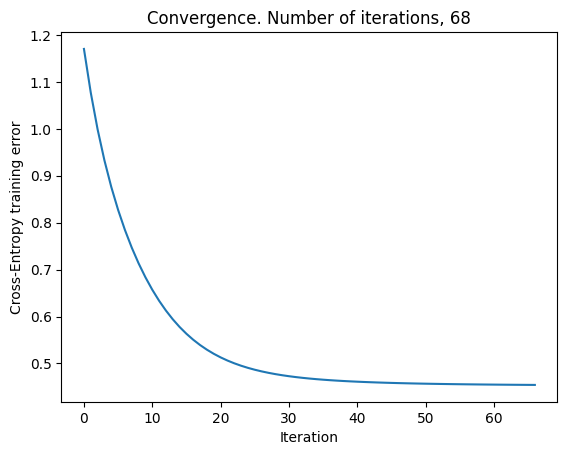

In [ ]:
# Accuracy of the Logistic Regression

# TODO
# Train the model
clf = my_GDClassifier(eps = 0.0001, max_iter = 1000, eta = 0.5, lam = 0)
clf.fit(X_train_scaled, y_train) # Entrenem el classificador
# Note that we had to change the learning rate for this different dataset
##############

print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled, y_train)}')
plt.title(f'Convergence. Number of iterations, {clf.nb_iter}')
plt.plot(clf.training_error)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy training error')

#### COMPUTE ERROR IN VALIDATION SET

In [ ]:
X_val_scaled = scaler.transform(X_val)
y_pred = clf.predict(X_val_scaled)
print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

The accuracy of the logistic regression on the validation set is 0.8044692737430168


#### LEARNING RATE, CONVERGENCE AND SPEED

Learning rate 0.01 .Time taken to run: 8.300615782000023 . Number of iterations 911
Learning rate 0.1 .Time taken to run: 2.400927695000064 . Number of iterations 182
Learning rate 1.0 .Time taken to run: 0.3307347900001787 . Number of iterations 23
Learning rate 10.0 .Time taken to run: 8.886215159999892 . Number of iterations 1000


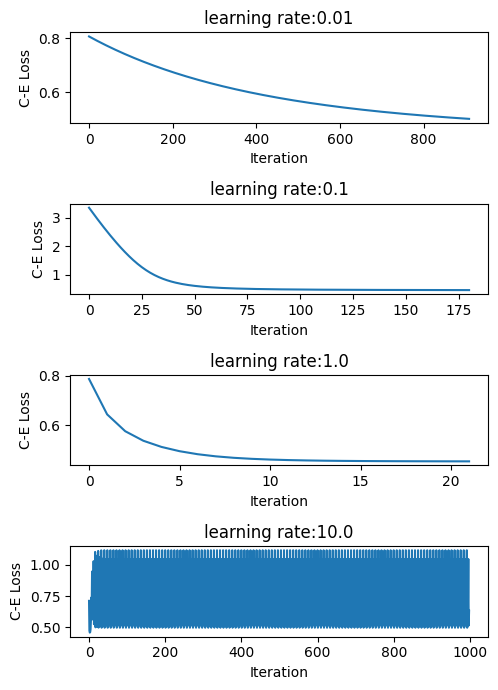

In [ ]:
nexp = 4
fig, axs = plt.subplots(nexp, figsize = (5,7))
vlr = np.logspace(-2,1,nexp)
for i in np.arange(nexp):
    lr = vlr[i]
    t1 = time.perf_counter()

    #TODO
    #Train our model on the non augmented dataset with the corresponding
    # learning rate (lr) and max_iter = 1000
    clf = my_GDClassifier(add_bias=True, lam=0.0001, max_iter=1000, eps=0.0001, eta=lr) # Creem una instància del classificador
    clf.fit(X_train_scaled, y_train) # Entrenem el classificador
    #Assess performance
    t2 = time.perf_counter()
    print('Learning rate',lr,'.Time taken to run:',t2-t1,'. Number of iterations', clf.nb_iter)
    y_pred = clf.predict(X_val)
    axs[i].plot(clf.training_error,label = f'learning rate:{lr}')
    axs[i].set_title(f'learning rate:{lr}')
    axs[i].set_ylabel('C-E Loss')
    axs[i].set_xlabel('Iteration')

plt.tight_layout()


**Q6:** For which values of the learning rate we find convergence?
- For values of $\eta<1$. For values of $\eta<0.01$ convergence is very slow but eventually will converge. For $\eta=10$ there is oscillation and it does not converge.


**Q7:** Which value of the learning rate do you think is optimal?
- In this case, a value of $\eta=1$ appears optimal. Could also be that higher values lead to faster convergence.

## Stochastic Gradient Descent


The accuracy of the logistic regression on the training set is 0.7780898876404494
Convergence in : 500 iterations
The accuracy of the logistic regression on the validation set is 0.8100558659217877


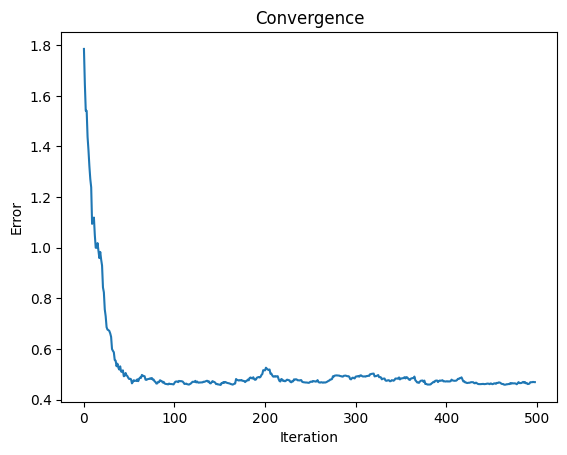

In [ ]:
# TODO
# Train the logistic regression model on the scaled data with parameters:
# Learning rate: 0.1
# Convergence condition (eps): 1e-8
# Maximum number of iterations: 500
# Choose different values for the batch size parameter and see what happens
clf = my_SGDClassifier(batch_size=2, eps = 1e-8, max_iter = 500, eta = .1, lam = 0)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_val_scaled)
plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.plot(clf.training_error,label=f'Batch size: 0.1')
print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
print('Convergence in :',clf.nb_iter,'iterations')
print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

Now that we got a sense of how it affects, let's study it more rigorously and sweep the space of possibilities for the mini-batch sizes. Typically, the size of the minibatch is a power of $2$, for hardware reasons.

We will set the value of $\epsilon$ sufficiently small ($\epsilon=10^{-8}$) to analyze the curve for `max_iter` iterations.

The accuracy of the logistic regression on the training set is 0.7668539325842697
The accuracy of the logistic regression on the validation set is 0.7541899441340782
The accuracy of the logistic regression on the training set is 0.7991573033707865
The accuracy of the logistic regression on the validation set is 0.8100558659217877
The accuracy of the logistic regression on the training set is 0.7949438202247191
The accuracy of the logistic regression on the validation set is 0.7988826815642458
The accuracy of the logistic regression on the training set is 0.7935393258426966
The accuracy of the logistic regression on the validation set is 0.8044692737430168


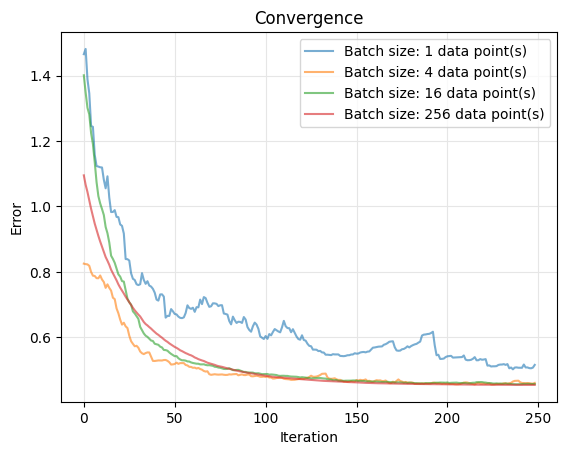

In [ ]:
batch_sizes = []
n_iters = []

for size in [1,4,16,256]:

  # TODO
  # Train the logistic regression model on the scaled data as before, with the iterating size values
  clf = my_SGDClassifier(batch_size=size, eps = 1e-8, max_iter = 250, eta = .1, lam = 0)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_val_scaled)

  plt.plot(clf.training_error,label=f'Batch size: {size} data point(s)',alpha = 0.6)
  batch_sizes.append(round(size*X_train_scaled.shape[0]))
  n_iters.append(clf.nb_iter)
  print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
  #print('Convergence in :',clf.nb_iter,'iterations')
  print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid(color=[.9,.9,.9])
plt.legend()

Ploting training error against number of iteration is not giving a fair comparison of the speed of the algorithm with different batch sizes. Indeed at each iteration, with `batch size=1`, you only see one new datapoint, while with `batch_size=256`, you see 256 new data points. To remedy that, we will plot the training error against the number of points seen by the algorithm.

The accuracy of the logistic regression on the training set is 0.7823033707865169
The accuracy of the logistic regression on the validation set is 0.8044692737430168
The accuracy of the logistic regression on the training set is 0.773876404494382
The accuracy of the logistic regression on the validation set is 0.8100558659217877
The accuracy of the logistic regression on the training set is 0.7879213483146067
The accuracy of the logistic regression on the validation set is 0.8100558659217877
The accuracy of the logistic regression on the training set is 0.49297752808988765
The accuracy of the logistic regression on the validation set is 0.5363128491620112


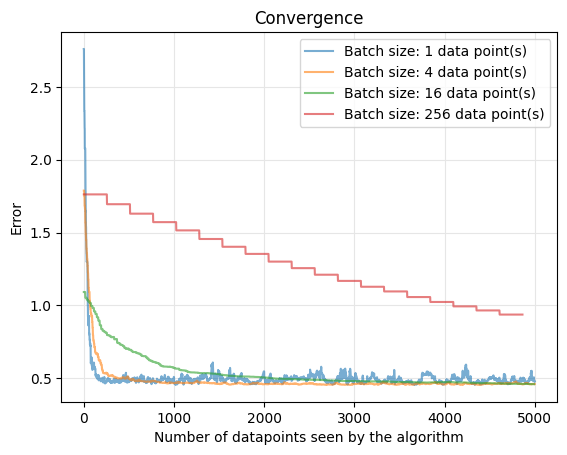

In [ ]:
batch_sizes = []
n_iters = []
n_points = 5000

for size in [1,4,16,256]:

  # TODO
  # Train the logistic regression model on the scaled data as before, with the iterating size values
  clf = my_SGDClassifier(batch_size=size, eps = 1e-8, max_iter = n_points //size + 1, eta = .1, lam = 0)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_val_scaled)

  error_history = [clf.training_error[i//size] for i in range(len(clf.training_error)*size-1)]
  plt.plot(error_history, label=f'Batch size: {size} data point(s)',alpha = 0.6)
  batch_sizes.append(round(size*X_train_scaled.shape[0]))
  n_iters.append(clf.nb_iter)
  print(f'The accuracy of the logistic regression on the training set is {clf.score(X_train_scaled,y_train)}')
  #print('Convergence in :',clf.nb_iter,'iterations')
  print(f'The accuracy of the logistic regression on the validation set is {(y_pred == y_val).mean()}')

plt.title('Convergence')
plt.xlabel('Number of datapoints seen by the algorithm')
plt.ylabel('Error')
plt.grid(color=[.9,.9,.9])
plt.legend()

**Q8:** What happens when we use very few points for the SGD update?
- For a batch size of $1$ the error curve is too noisy. It is difficult to guess if the algorithm converged or not. The error curve becomes smoother as the batch size increase. For relatively small sizes ($4$ data points) the curve looks very good. For a batch size of $256$ we observe no difference between using batches or the entire dataset.

**Q9:** Is there any advantage of using less points than the total size of the training dataset?
- Yes, we do not need to compute the gradient for all the $N$ points in the dataset to have a robust estimate of the gradient. With only a few samples ($4$) we can reliably estimate the gradient.